In [121]:
# Import Modules
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
from math import log10, floor

plt.style.use("seaborn") # Pretty graphs

In [122]:
# Round to specified number of significant digits
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [123]:
df = pd.read_csv("../data/g_radii_nmin100_nmax5000000.csv", delimiter = ",", header = None)

df.columns = ["Particles", "Runtime", "Gyration Radius", "Seeds", "D Max"]

# Split dataframe by d_max
df_50 = df[df["D Max"] == 50]
df_90 = df[df["D Max"] == 90]
df_140 = df[df["D Max"] == 140]
df_200 = df[df["D Max"] == 200]

In [124]:
def calc_ols(x, y):
    x_mod = sm.add_constant(data = x)
    model = sm.OLS(y, x_mod)
    results = model.fit()
    params = results.params
    bse = results.bse

    gradient = params[1]
    intercept = params[0]

    y_fit = gradient * x + intercept

    gradient_err = bse[1]

    return (y_fit, gradient, gradient_err)

def get_big_o(x, y):
    (y_fit, gradient, gradient_err) = calc_ols(x, y)

    gradient_err = round_sig(gradient_err/gradient**2, 1)
    gradient_dec = str(gradient_err)[::-1].find(".")
    gradient = np.round(gradient, gradient_dec)

    return (y_fit, gradient, gradient_err)
 
def get_fractal_dimension(x, y):
    (y_fit, gradient, gradient_err) = calc_ols(x, y)

    d_f = 1/gradient
    d_f_err = round_sig(gradient_err/gradient**2, 1)
    d_f_dec = str(d_f_err)[::-1].find(".")
    d_f = np.round(d_f, d_f_dec)

    return(y_fit, d_f, d_f_err)


def plot_radii(df, ax):
    # Parse columns from file
    n = df["Particles"].apply(np.log)
    r = df["Gyration Radius"].apply(np.log)
    d_max = int(df["D Max"].head(1))

    (r_fit, d_f, d_f_err) = get_fractal_dimension(x = n, y = r)

    ax.scatter(n, r, label = r"$d_{max}$ = " + str(d_max) + "; " + r"$d_f =$" + str(d_f) + r"$\pm$" + str(d_f_err), zorder = 2)
    ax.plot(n, r_fit, linestyle = "--", zorder = 1, alpha = 0.5)


def plot_runtime(df, ax):
    # Parse columns from file
    n = df["Particles"].apply(np.log)
    t = df["Runtime"].apply(np.log)
    d_max = int(df["D Max"].head(1))

    (t_fit, d_f, d_f_err) = get_big_o(x = n, y = t)

    ax.scatter(n, t, label = r"$d_{max}$ = " + str(d_max) + "; " + r"\$\sim O(n^{{{{}}}})$".format(d_f))

    # ax.scatter(n, t, label = r"$d_{max}$ = " + str(d_max) + "; " + r"$\alpha =$" + str(d_f) + r"$\pm$" + str(d_f_err), zorder = 2)
    ax.plot(n, t_fit, linestyle = "--", zorder = 1, alpha = 0.5)
    

/home/ben/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


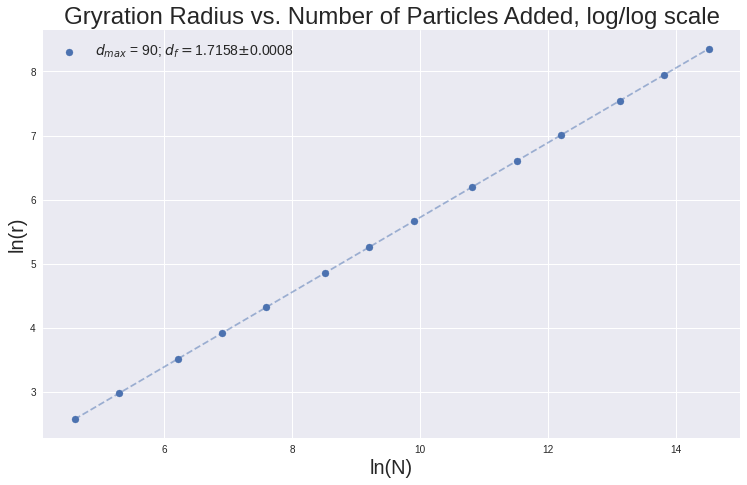

In [125]:
# Create figure for raw data (gyration radius)
fig = plt.figure(1)
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)


ax.set_title("Gryration Radius vs. Number of Particles Added, log/log scale", fontsize=24)
ax.set_xlabel("ln(N)", fontsize=20)
ax.set_ylabel("ln(r)", fontsize=20)


# for df in [df_50, df_90, df_140, df_200]:
#     plot_radii(df = df, ax = ax)

plot_radii(df = df_90, ax = ax)


ax.legend(fontsize = 14)

plt.show()

/home/ben/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/ben/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/ben/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


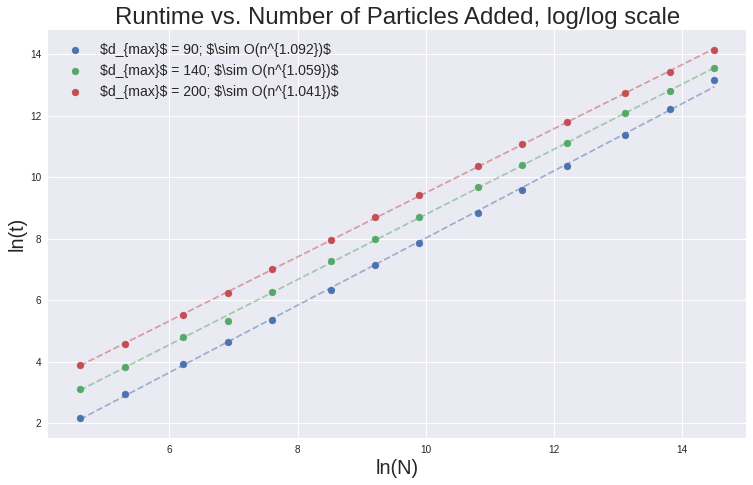

In [126]:
# Create figure for raw data (gyration radius)
fig = plt.figure(1)
fig.set_size_inches(12.5, 7.5)
ax = plt.subplot(111)


ax.set_title("Runtime vs. Number of Particles Added, log/log scale", fontsize=24)
ax.set_xlabel("ln(N)", fontsize=20)
ax.set_ylabel("ln(t)", fontsize=20)


# for df in [df_50, df_90, df_140, df_200]:
#     plot_runtime(df = df, ax = ax)

for df in [df_90, df_140, df_200]:
    plot_runtime(df = df, ax = ax)

ax.legend(fontsize = 14)

plt.show()